# Solar Wind, Corona, and Geomagnetic Storms Overview

This notebooke provides some basic data analysis and visualization of time series of observations of the solar wind, solar corona, and Earth's magnetosphere. 

In the first part, I investigate the data from the ACE spacecraft as recorded in the OMNI low res data to verify relations presented in the literature on space weather. To begin with, I reproduce Figures 5-8 of C. T. Russell's chapter "Solar Wind and Interplanetary Magnetic Field: A Tutorial" in the AGU Space Weather monograph. These figures show the observational relationships between the solar wind speed, density, and temperature.

I then also investigate datasets of the solar corona and generate some basic visualizations of solar activity alongside solar wind and geomagnetic variability.

There are also visualizations of storms on their own.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

import seaborn as sns

plt.style.use('seaborn-talk')

In [3]:
# load data
omni = pd.read_hdf('data/omni_hourly_alldata_smallfilled.h5')
est = pd.read_hdf('data/dst_est_ist.h5')['est'].copy()
cme = pd.read_hdf('data/cme_hourly_complete.h5')
goes = pd.read_hdf('data/GOES_xrs_xhf_hourly_1986-2018.h5')

t_omni = omni.index

# combine
data = pd.concat([omni, goes, est, cme], axis=1)
t = data.index

# Solar Wind

## Recreate Figures

Now let's reproduce Figures 5-8 from Russell's chapter. The first figure is a distribution of the solar wind speed:

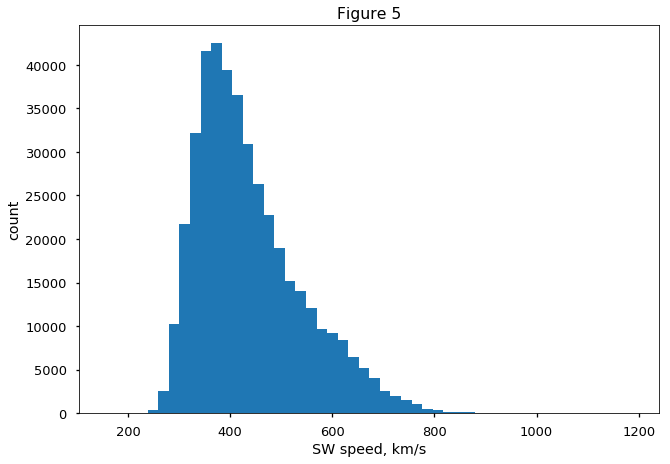

In [8]:
# idx = omni['SW plasma speed (km/s)'] != nanvals['SW plasma speed (km/s)']

plt.hist(omni['SW Plasma Speed, km/s'], bins=50)
plt.xlabel('SW speed, km/s')
plt.ylabel('count')
plt.title('Figure 5')
plt.show()

Figure 6 shows the logarithm of the solar wind density:

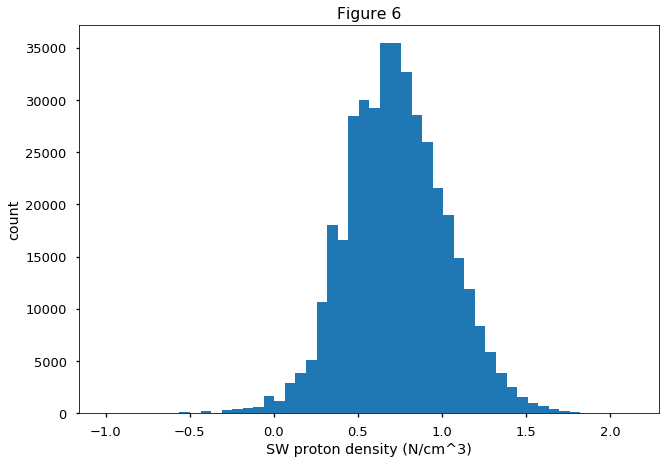

In [22]:
idx = (omni['SW Proton Density, N/cm^3'].notna()) & (omni['SW Proton Density, N/cm^3'] != 0)

plt.hist(np.log(omni[idx]['SW Proton Density, N/cm^3'])/np.log(10), bins=50)
plt.xlabel('SW proton density (N/cm^3)')
plt.ylabel('count')
plt.title('Figure 6')
plt.show()

Figure 7 is a bit more complicated and shows the variation of the solar wind density with solar wind velocity:

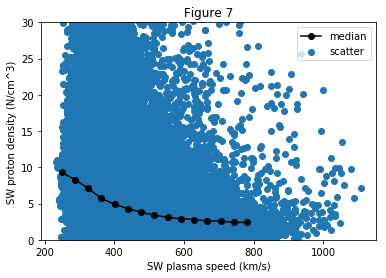

In [123]:
idx = (X['SW proton density (N/cm^3)'] != nanvals['SW proton density (N/cm^3)']) & (X['SW plasma speed (km/s)'] != nanvals['SW plasma speed (km/s)'])

# compute median values within bins of velocity
nbin = 15
bins = np.linspace(230,800,nbin+1)
bincen = bins[0:-1]+np.diff(bins)[0]/2
binidx = np.digitize(X[idx]['SW plasma speed (km/s)'].values, bins)
med = np.zeros(nbin)
for ii in range(nbin):
    med[ii] = np.median(X[idx]['SW proton density (N/cm^3)'][binidx == (ii+1)])

plt.scatter(X[idx]['SW plasma speed (km/s)'], X[idx]['SW proton density (N/cm^3)'], label='scatter')
ln1, = plt.plot(bincen, med, 'ko-', label='median')
plt.xlabel('SW plasma speed (km/s)')
plt.ylabel('SW proton density (N/cm^3)')
plt.title('Figure 7')
plt.legend()
plt.ylim([0, 30])
plt.show()

Finally, Figure 8 shows the solar wind proton temperature compared to the velocity:

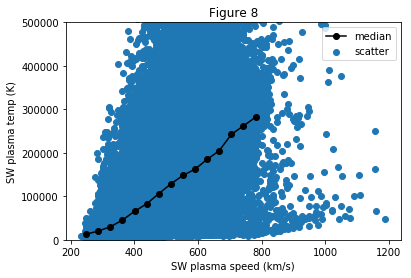

In [124]:
idx = (X['SW plasma temp (K)'] != nanvals['SW plasma temp (K)']) & (X['SW plasma speed (km/s)'] != nanvals['SW plasma speed (km/s)'])

# compute median values within bins of velocity
nbin = 15
bins = np.linspace(230,800,nbin+1)
bincen = bins[0:-1]+np.diff(bins)[0]/2
binidx = np.digitize(X[idx]['SW plasma speed (km/s)'].values, bins)
med = np.zeros(nbin)
for ii in range(nbin):
    med[ii] = np.median(X[idx]['SW plasma temp (K)'][binidx == (ii+1)])

plt.scatter(X[idx]['SW plasma speed (km/s)'], X[idx]['SW plasma temp (K)'], label='scatter')
ln1, = plt.plot(bincen, med, 'ko-', label='median')
plt.xlabel('SW plasma speed (km/s)')
plt.ylabel('SW plasma temp (K)')
plt.title('Figure 8')
plt.legend()
plt.ylim([0, 5e5])
plt.show()

Comparing with the figures shown by Russell, we see that the OMNI low-res data capture essentially the same trends, demonstrating the reproducibility of the observational data.

## Linearities within input data

Recreate the matrix figures with cross correlations

## Correlations with Dst, external coefficients

Make figures for autocorrelation of Dst and external coefficients.

# Storm-time Visualizations

Make some figures of input data and outputs during a few storms.

## Halloween storm visualization of Dst, Est, Ist

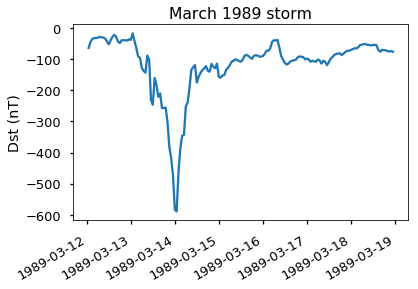

In [14]:
idx = (t_omni > pd.Timestamp('1989-03-12')) & (t_omni < pd.Timestamp('1989-03-19'))

fig = plt.figure(figsize=(6,4))
plt.plot(omni[idx]['Dst (nT)'])
plt.ylabel('Dst (nT)')
plt.title('March 1989 storm')
fig.autofmt_xdate()
plt.savefig('figures/1989_storm.pdf', format='pdf', bbox_inches='tight')
plt.show()


### Compare Dst, Est, Ist

In [45]:
field = pd.read_hdf('data/dst_est_ist.h5')
est = field['est']
ist = field['ist']
t_field = field.index

idx_omni = (t_omni > pd.Timestamp('2003-10-26')) & \
            (t_omni < pd.Timestamp('2003-11-04'))
idx_field = (t_field > pd.Timestamp('2003-10-26')) & \
            (t_field < pd.Timestamp('2003-11-04'))

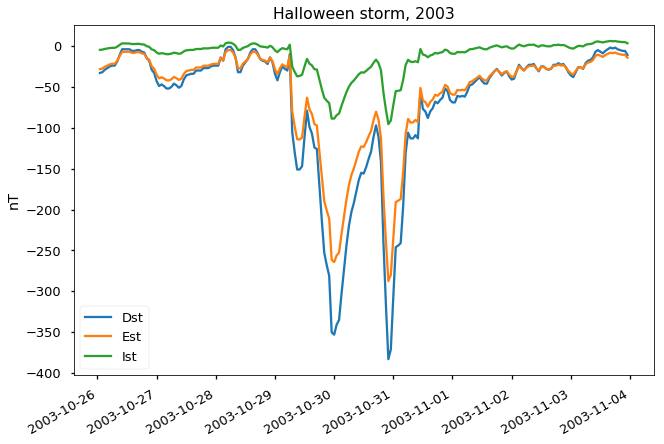

In [55]:
fig = plt.figure()
plt.plot(field[idx_field]['dst'], label='Dst')
plt.plot(field[idx_field]['est'], label='Est')
plt.plot(field[idx_field]['ist'], label='Ist')
plt.ylabel('nT')
plt.legend()
plt.title('Halloween storm, 2003')
fig.autofmt_xdate()
plt.savefig('figures/halloween_storm_est_ist.pdf', format='pdf')
plt.show()

## Select storms alongside solar wind, corona time series

In [5]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

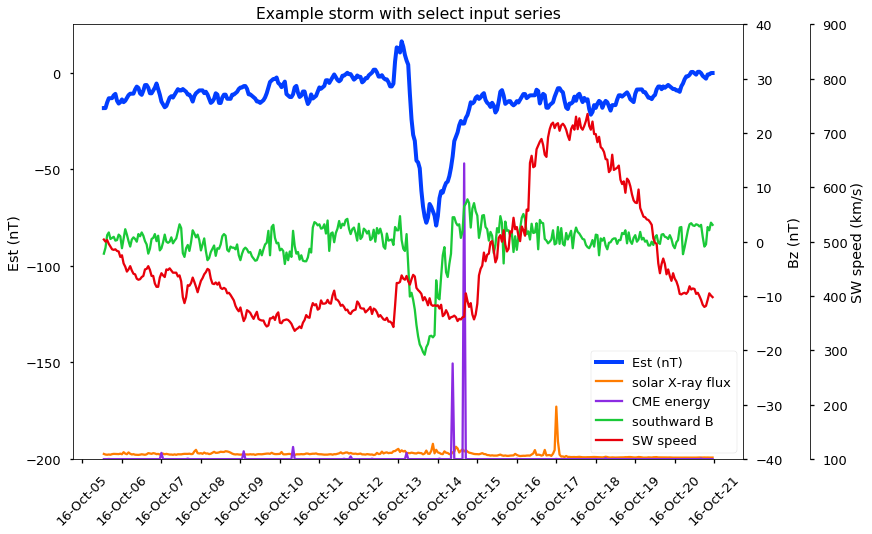

In [7]:
# storm 4
# idx = (t > np.datetime64('2015-03-12T12:00')) & \
#         (t < np.datetime64('2015-03-22T00:00'))

# storm 1
idx = (t > np.datetime64('2016-10-05T12:00')) & \
        (t  < np.datetime64('2016-10-21T00:00')) 

# storm 5
# idx = (t > np.datetime64('2015-07-07T00:00')) & \
#         (t < np.datetime64('2015-07-19T00:00'))

full_fmt = mdates.DateFormatter('%y-%b-%d, %H')
yr_mon_dd_fmt = mdates.DateFormatter('%y-%b-%d')
hour_tick = mdates.HourLocator()
day_tick = mdates.DayLocator()

cmap = sns.color_palette('bright')

fig = plt.figure(figsize=[12, 8])
ax1 = plt.axes()
ax2 = fig.add_axes(ax1.get_position())
ax3 = ax2.twinx()
ax4 = ax2.twinx()
ax5 = ax2.twinx()

l_est = ax1.plot(data[idx]['est'], label='Est (nT)', color=cmap[0], linewidth=4)
l_xray = ax2.plot(data[idx]['long channel'], label='solar X-ray flux', color=cmap[1])
l_cme = ax3.plot(data[idx]['Kinetic energy'], label='CME energy', color=cmap[4])
l_bz = ax4.plot(data[idx]['BZ, nT (GSM)'], label='southward B', color=cmap[2])
l_v = ax5.plot(data[idx]['SW Plasma Speed, km/s'], label='SW speed', color=cmap[3])

ax1.xaxis.set_major_formatter(yr_mon_dd_fmt)
ax1.tick_params(axis='x', rotation=45)
ax1.xaxis.set_major_locator(day_tick)
# ax1.xaxis.set_minor_locator(hour_tick)
ax1.set_ylim([-200, 25])
ax1.set_yticks([0, -50, -100, -150, -200])
ax1.set_ylabel('Est (nT)')

ax4.yaxis.set_label_position('right')
ax4.yaxis.set_ticks_position('right')
ax5.yaxis.set_label_position('right')
ax5.yaxis.set_ticks_position('right')

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4.get_xaxis().set_visible(False)
# ax4.get_yaxis().set_visible(False)

ax5.get_xaxis().set_visible(False)
# ax5.get_yaxis().set_visible(False)
ax5.spines["right"].set_position(("axes", 1.1))

make_patch_spines_invisible(ax2)
make_patch_spines_invisible(ax3)
make_patch_spines_invisible(ax4)
make_patch_spines_invisible(ax5)

ax5.spines["right"].set_visible(True)

ax4.set_ylabel('Bz (nT)')
ax5.set_ylabel('SW speed (km/s)')

ax2.set_ylim([0, 2e-5])
ax3.set_ylim([0, 5e31])
ax4.set_ylim([-40, 40])
ax5.set_ylim([100, 900])

lns = l_est + l_xray + l_cme + l_bz + l_v
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc='lower right')
plt.title('Example storm with select input series')
# plt.savefig('figures/storm5_est_inputs.pdf', format='pdf', bbox_inches='tight')
plt.show()